# Census Data Challenge

In [4]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot as plt
%matplotlib inline

## Incomes Over Time

read in the data

In [5]:
incomes = pd.read_csv('incomes.csv')
incomes.head()

year  income     county
0  2010   29080  Dickenson
1  2011   30556  Dickenson
2  2012   32622  Dickenson
3  2013   33318  Dickenson
4  2014   33106  Dickenson

In [6]:
incomes['income'] = pd.to_numeric(incomes['income'])

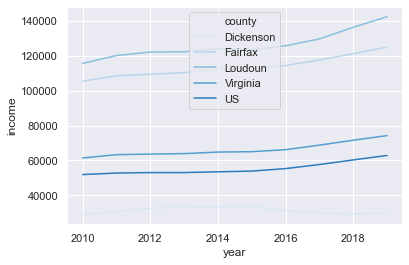

In [7]:
sns.set(style="darkgrid", palette="Blues")
nyc_chart = sns.lineplot(
    data=incomes,
    x="year",
    y="income",
    hue='county'
)
plt.show()

In [8]:
income2 = pd.read_csv('income2.csv')
income2.head()

year  Dickenson  Fairfax  Loudoun  Virginia     US
0  2010      29080   105416   115574     61406  51914
1  2011      30556   108439   120096     63302  52762
2  2012      32622   109383   122068     63636  53046
3  2013      33318   110292   122238     63907  53046
4  2014      33106   112102   123966     64792  53482

In [10]:
incomeFig = go.Figure()

for idx,column in enumerate(income2):
    if column == 'year': continue
    fig.add_trace(go.Scatter(x=income2['year'], y=income2[column].tolist(), name=column))
incomeFig.show()

In [11]:
color = {
    'Dickenson': ['#08BFB3', 'rgba(8, 191, 179,0.2)'],
    'Fairfax': ['#0A49F5', 'rgba(10, 73, 245, 0.2)'],
    'Loudoun': ['#1480DE'],
    'Virginia': ['#eb4034'],
    'US': ['#51545c']
}

In [12]:
from scipy import signal

In [28]:
def createFig(df, yaxis_title, title):
    fig = go.Figure()
    for idx,column in enumerate(df):
        if column == 'year': continue
        if column == 'US' or column == 'Virginia':
            fig.add_trace(go.Scatter(x=df['year'], y=signal.savgol_filter(df[column].tolist(), 7, 3), name=column, line_dash='dash'))

        elif len(color[column]) > 1:
            '''x_rev = income2['year'].tolist()[::-1]
            y_upper = [i+3000 for i in income2[column].tolist()]
            y_lower = [i-3000 for i in income2[column].tolist()]
            y_lower = y_lower[::-1]
            fig.add_trace(go.Scatter(
                x=income2['year'].tolist()+x_rev,
                y=y_upper+y_lower,
                fill='toself',
                fillcolor=color[column][-1],
                line_color='rgba(255,255,255,0)',
                name=column,
                showlegend=False
            ))'''
            name = column+' County'
            fig.add_trace(go.Scatter(x=df['year'], y=signal.savgol_filter(df[column].tolist(), 7, 3), name=name, line=dict(width=4)))
        else:
            name = column+' County'
            fig.add_trace(go.Scatter(x=df['year'], y=signal.savgol_filter(df[column].tolist(), 7, 3), name=name))
    fig.update_xaxes(range=(2010, 2019), title='year')
    fig.update_yaxes(title=yaxis_title)
    fig.update_layout(title=title)
    fig.update_traces(mode='lines')
    fig.show()
    return fig

In [29]:
incomeFig = createFig(income2, 'median income', 'Median Income Over Time')

In [30]:
eduattain = pd.read_csv('eduattain.csv')
eduFig = createFig(eduattain, 'educational attainment', 'Educational Attainment Over Time')

In [31]:
poverty = pd.read_csv('childrenpoverty.csv')
povertyFig = createFig(poverty, '% of children (under 18) in poverty', 'Percentage of Children in Poverty Over Time')

In [32]:
import keys
import chart_studio

In [33]:
chart_studio.tools.set_credentials_file(username=keys.username, api_key=keys.api_key)

In [34]:
def getEmbed(fig,name):
    link = chart_studio.plotly.plot(fig, filename=name)
    return chart_studio.tools.get_embed(link)

In [39]:
getEmbed(povertyFig, 'children in poverty')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~smsingh/13.embed" height="525" width="100%"></iframe>'